Pyber Observable Trends:

- The majority of Pyber revenue from fares is driven by Urban areas
- Likely due to population or demand, urban areas also have a larger amount of drivers and ride frequencies
- People from the suburbs and rural communities are less likely to be ride share drivers than people from urban areas, however, about a third of all fares and rides come from those in suburban and rural areas.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file = "city_data.csv"
file = pd.read_csv(file)

file2 = "ride_data.csv"
file2 = pd.read_csv(file2)

In [4]:
combined_df = pd.merge(file2, file, how='outer', on=['city'])
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [5]:
city_grouped_df = combined_df.groupby(['city', 'type'])

In [6]:
city_grouped_df.count().head()

,,date,fare,ride_id,driver_count
city,type,,,,
Alvarezhaven,Urban,31,31,31,31
Alyssaberg,Urban,26,26,26,26
Anitamouth,Suburban,9,9,9,9
Antoniomouth,Urban,22,22,22,22
Aprilchester,Urban,19,19,19,19


In [7]:
avg_fare = round(city_grouped_df["fare"].mean(), 2)
total_rides = city_grouped_df["ride_id"].count()
total_drivers = city_grouped_df["driver_count"].sum()//city_grouped_df["driver_count"].count()
area_type = city_grouped_df["type"].apply(list).apply(set)

city_df = pd.DataFrame({"Average Fare":avg_fare,
                                   "Total Rides":total_rides,
                                "Total Drivers":total_drivers,
                            "Area Type":area_type
                       })

city_df["Average Fare"] = avg_fare
city_df["Total Rides"] = total_rides
city_df["Total Drivers"] = total_drivers

city_df.head()


,,Area Type,Average Fare,Total Drivers,Total Rides
city,type,,,,
Alvarezhaven,Urban,{Urban},23.93,21,31
Alyssaberg,Urban,{Urban},20.61,67,26
Anitamouth,Suburban,{Suburban},37.32,16,9
Antoniomouth,Urban,{Urban},23.62,21,22
Aprilchester,Urban,{Urban},21.98,49,19


In [8]:
city_df["Average Fare"] = pd.to_numeric(city_df["Average Fare"])


In [9]:
city_df.columns

Index(['Area Type', 'Average Fare', 'Total Drivers', 'Total Rides'], dtype='object')

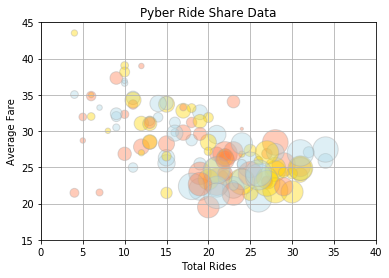

In [10]:
x = "Total Rides"
y = "Average Fare"
z = "Total Drivers"

colors = ['gold', 'lightblue', 'coral']

city_df.plot.scatter(x, y, s=city_df['Total Drivers']*10, alpha=0.4, c=colors, edgecolors='darkgrey',
                    grid=True)
#hue="Area Type"
plt.xlim(0,40)
plt.ylim(15,45)

plt.xlabel('Total Rides')
plt.ylabel('Average Fare')
plt.title("Pyber Ride Share Data")

plt.show()

In [11]:
city_grouped_df.count().head()

,,date,fare,ride_id,driver_count
city,type,,,,
Alvarezhaven,Urban,31,31,31,31
Alyssaberg,Urban,26,26,26,26
Anitamouth,Suburban,9,9,9,9
Antoniomouth,Urban,22,22,22,22
Aprilchester,Urban,19,19,19,19


In [12]:
city_grouped_df2 = combined_df.groupby(['type'])
city_grouped_df2.count().head()

,city,date,fare,ride_id,driver_count
type,,,,,
Rural,125,125,125,125,125
Suburban,657,657,657,657,657
Urban,1625,1625,1625,1625,1625


In [13]:
city_grouped_df2.sum()

,fare,ride_id,driver_count
type,,,
Rural,4255.09,658729360193746,727
Suburban,20335.69,3139583688401015,9730
Urban,40078.34,7890194186030600,64501


In [14]:
fares = city_grouped_df2['fare'].sum()
drivers = city_grouped_df2['driver_count'].sum()
ride_id = city_grouped_df2['ride_id'].count()
cities_df = pd.DataFrame ({"Fares":fares,"Drivers":drivers,"Total Rides":ride_id})

#cities_df.loc['Total']= cities_df.sum()

cities_df


,Drivers,Fares,Total Rides
type,,,
Rural,727,4255.09,125
Suburban,9730,20335.69,657
Urban,64501,40078.34,1625


In [15]:
driver_percent = round(cities_df.iloc[:,0]/cities_df.iloc[:,0].sum()*100, 2)
cities_df['Driver Percent'] = driver_percent

fare_percent = round(cities_df.iloc[:,1]/cities_df.iloc[:,1].sum()*100, 2)
cities_df['Fare Percent'] = fare_percent

ride_percent = round(cities_df.iloc[:,2]/cities_df.iloc[:,2].sum()*100, 2)
cities_df['Ride Percent'] = ride_percent

final_df = pd.DataFrame ({"Fare Percentage":fare_percent,"Driver Percentage":driver_percent,"Ride Percentage":ride_percent})

final_df


,Driver Percentage,Fare Percentage,Ride Percentage
type,,,
Rural,0.97,6.58,5.19
Suburban,12.98,31.45,27.30
Urban,86.05,61.97,67.51


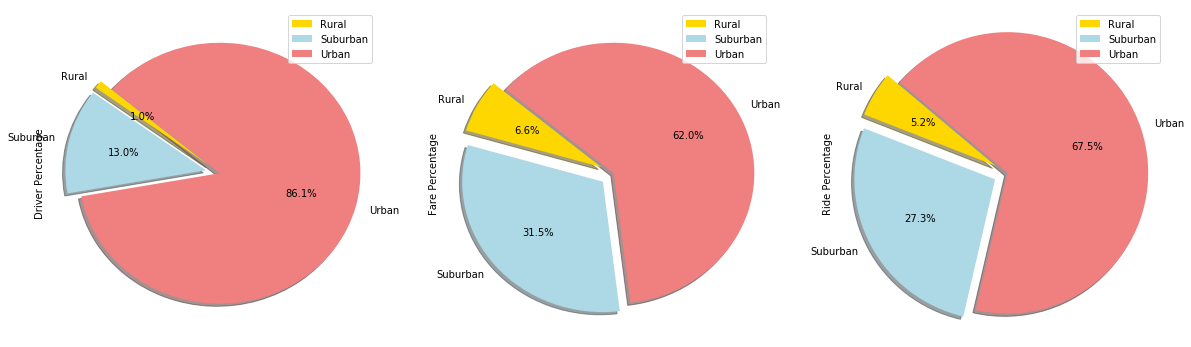

In [16]:
colors = ["gold", "lightblue", "lightcoral"]

explode = (0.1, 0.1, 0)

pie_plot1 = pd.DataFrame(final_df, index=['Rural', 'Suburban', 'Urban'])

pie_plot1.plot.pie(subplots=True, figsize=(20, 6), colors=colors, explode=explode, shadow=True, startangle=140, autopct="%1.1f%%")

plt.axis("equal")

plt.show()